# Puncte de echilibru. Stabilitate

In cadrul acestui laborator sunt prezentate instructiunile necesare studiului calitativ al solutiilor in jurul punctelor de echilibru in cazul ecuatiilor scalare autonome si a sistemelor planare de ecuatii autonome.

## Ecuatii scalare autonome

Ecuatiile scalare autonome sunt de forma:

\begin{equation*}
x^{\prime }=f\left( x\right) 
\end{equation*}

Solutiile constante $x(t) ≡ x^*$ ale ecuatiei diferentiale autonome se numesc **solutii de echilibru**, valoarea $x^*$ se numeste **punct de echilibru**. Punctele de echilibru sunt solutiile reale ale ecuatiei:
  
\begin{equation*}
f\left( x\right)=0
\end{equation*}

Fie ecuatia diferentiala autonoma:
\begin{equation*}
x^{\prime }=x\left(1- x^2\right) 
\end{equation*}


In [1]:
reset()
t=var('t')
x=function('x')(t)

In [2]:
s=var('s')
f=function('f')(s)
f(s)=s*(1-s^2)

Punctele de echilibru se determina prin rezolvarea ecuatiei $f(s)=0$

In [3]:
eqp=solve(f(s)==0,s)
eqp

[s == -1, s == 1, s == 0]

Pentru studiul stabilitatii punctelor de echilibru pot fi aplicate doua metode, fie se aplica Teorema stabilitatii in prima aproximatie sau metoda grafica (analiza campului de directii).

<b>Teorema stabilitatii in prima aproximatie</b>

Fie $x^{\ast }$ un punct de echilibru al ecuatiei diferentiale autonome:
\begin{equation*}
x^{\prime }=f\left( x\right) 
\end{equation*}
unde  $f$ este de clasa $C^1$. Atunci:
1. Daca $f^{\prime }(x^{\ast })<0$ atunci $x^{\ast }$ este local asimptotic stabil;
+ Daca $f^{\prime }(x^{\ast })>0$ atunci $x^{\ast }$ este instabil.



### Prin aplicarea Teoremei stabilitatii in prima aproximatie

Punctele de echilibru ale ecuatiei autonome date sunt stocate in variabila de tip lista *eqp*

In [4]:
eqp[0]

s == -1

In [5]:
eqp[0].rhs()

-1

In [6]:
x1=eqp[0].rhs()
x1

-1

In [7]:
x2=eqp[1].rhs()
x2

1

In [8]:
x3=eqp[2].rhs()
x3

0

Pentru a aplica Teorema stabilitatii in prima aproximatie trebuie sa obtinem valoarea $f^\prime (-1)$

In [9]:
diff(f,s)(x1)

-2

Deoarece $f^\prime (x_1)=f^\prime (-1)=-2<0$ atunci punctul de echilibru $x_1=-1$ este local asimptotic stabil.

Vom proceda similar pentru celelalte doua puncte de echilibru $x_2=1$ and $x_3=0$:

In [10]:
diff(f,s)(x2)

-2

Deoarece $f^\prime (x_2)=f^\prime (1)=-2<0$ atunci punctul de echilibru $x_2=1$ este local asimptotic stabil.

In [11]:
diff(f,s)(x3)

1

Deci, $f^\prime (x_3)=f^\prime (0)=1>0$ ceea ce implica faptul ca punctul de echilibru $x_3=0$ este instabil.

### Metoda grafica (analiza campului de directii)

In cazul ecuatiilor scalare autonome, Sagemath nu are o comandă pentru a genera portretul fazic, stabilitatea soluțiilor de echilibru se poate obtine prin analiza campului de directii si reprezentarea grafica a solutiilor reprezentative.


In general, pentru ecuatia diferentiala
\begin{equation*}
x^{\prime }=f\left(t, x\right) 
\end{equation*}
campul de directii poate fi obtinut prin comanda

*plot_slope_field(f(t,x),(t,a,b),(x,c,d),headaxislength=n, headlength=m,color='color_name')*

In cazul ecuatiilor diferentiale autonome variabila independenta $t$ nu apare in mod explicit in expresia ecuatiei
\begin{equation*}
x^{\prime }=f\left(x\right) 
\end{equation*}
astfel, campul de directii se obtine utilizand comanda in forma:


*plot_slope_field(f(x),(t,a,b),(x,c,d),headaxislength=n, headlength=m,color='color_name')*

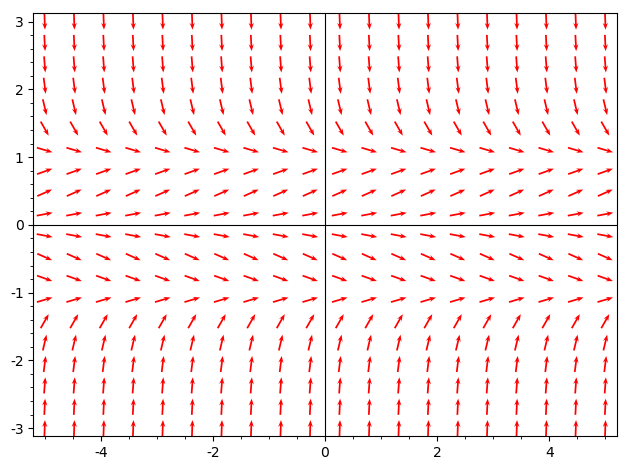

In [12]:
sf=plot_slope_field(f(s),(t,-5,5),(s,-3,3),headaxislength=3, headlength=4,color='red')
sf

Pentru a vizualiza comportamentul pe termen lung al solutiilor este necesara reprezentarea grafica a unor solutii reprezentative. Deoarece in general solutiile ecuatiilor autonome nu pot fi obtinute in mod explicit este necesara utilizarea unei metode numerice pentru reprezentarea grafica a solutiilor.

Comanda *desolve_rk4()* rezolva numeric problema Cauchy atasata ecuatiei prin utilizarea metodei numerice Runge-Kutta si returneaza fie o lista a valorilor solutiei pe o anumita diviziune a intervalului considerat sau graficul solutiei pe acest interval.

Structura comenzii este:

*desolve_rk4(de, dvar, ics=None, ivar=None, end_points=None, step=0.1, output='list')*


* Varianta 1 (functie de doua variabile)

    + *de* - membrul drept al ecuatiei, adica functia $f(x,y)$ din ecuatia $y′=f(x,y)$

    + *dvar* - variabila dependenta (functia necunoscuta)


+ Varianta 2 (ecuatia diferentiala simbolica)

    + *de* - ecuatia diferentiala incluzand termenul diff(y,x)

    + *dvar* - variabila dependenta (functia necunoscuta)


+ Alti parametrii:

    + *ivar* - trebuie specificat in cazul in care ecuatia este autonoma sau apar mai multi parametrii in ecuatia diferentiala

    + *ics* - conditia initiala de forma [x0,y0]

    + *end_points* - capetele intervalului

        + daca *end_points* este a sau [a], integrarea se face pe intervalul min(ics[0],a) si max(ics[0],a)

        + daca *end_points* este None, este utilizat implicit end_points=ics[0]+10

        + daca *end_points* este [a,b] integrarea se face pe intervalul min(ics[0], a) and max(ics[0], b)

    + *step* - (optional, default:0.1) marimea pasului metodei (numar pozitiv)
    

+ output - (optional, default: 'list') este una din 'list', 'plot', 'slope_field' (graficul contine solutia si campul de directii)


In [13]:
deq=diff(x,t)==f(x)
deq

diff(x(t), t) == -(x(t)^2 - 1)*x(t)

In [14]:
desolve_rk4(deq, x, [0,0.5], step=0.5, end_points= [-5,5], output='list')

[[-5.0, 0.003903791065104986],
 [-4.5, 0.006433631876193118],
 [-4.0, 0.01060269171808395],
 [-3.5, 0.01747228389973102],
 [-3.0, 0.02878800682685936],
 [-2.5, 0.04741101298323355],
 [-2.0, 0.07798679679354956],
 [-1.5, 0.1278641214708751],
 [-1.0, 0.2078424109397569],
 [-0.5, 0.3305423618917383],
 [0, 0.500000000000000],
 [0.5, 0.689416022585013],
 [1.0, 0.8431442383331245],
 [1.5, 0.9322733589084158],
 [2.0, 0.9730785242120609],
 [2.5, 0.9896725418081366],
 [3.0, 0.9960935743967014],
 [3.5, 0.998530305589941],
 [4.0, 0.9994481887463996],
 [4.5, 0.9997929755801175],
 [5.0, 0.9999223524467028]]

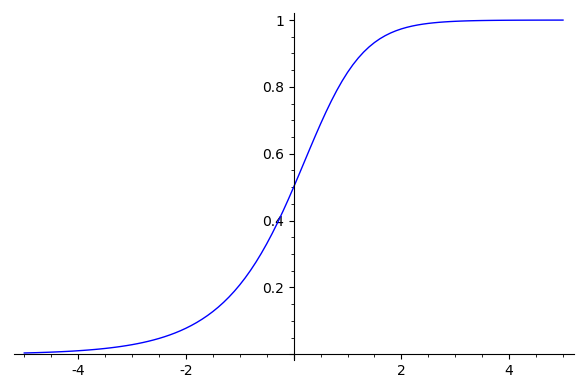

In [15]:
desolve_rk4(deq, x, [0,0.5], step=0.1, end_points= [-5,5], output='plot')

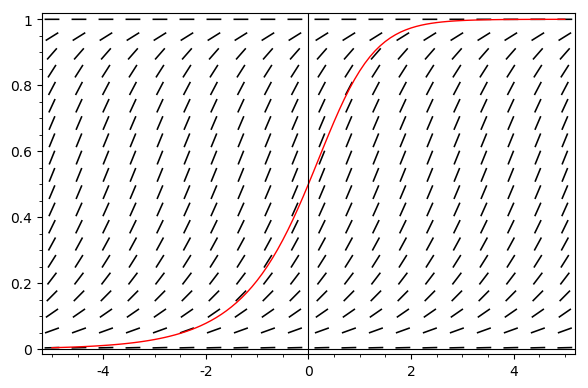

In [16]:
desolve_rk4(deq, x, [0,0.5], step=0.1, end_points= [-5,5], output='slope_field',color='red')

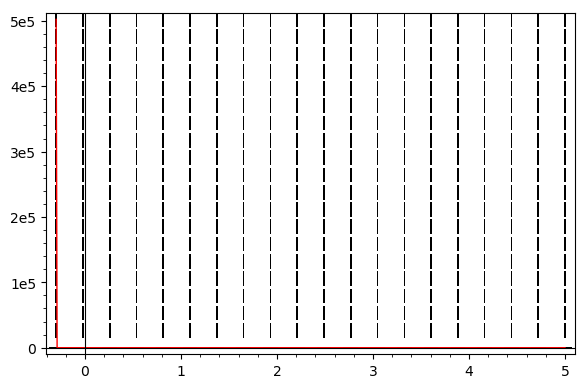

In [17]:
desolve_rk4(deq, x, [0,1.5], step=0.01, end_points= [-5,5], output='slope_field',color='red')

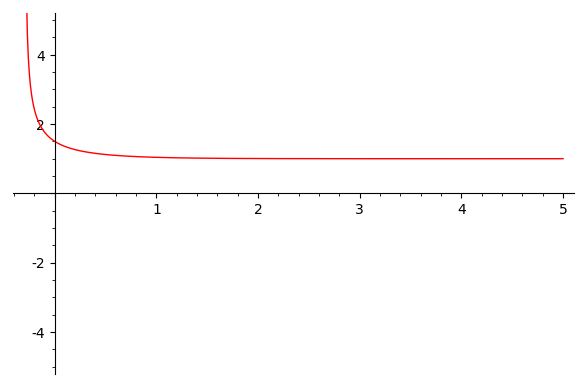

In [18]:
g=desolve_rk4(deq, x, [0,1.5], step=0.01, end_points= [-5,5], output='plot',color='red')
g.show(ymin=-5,ymax=5)

In cazul ecuatiei considerate avem punctele de echilibru $x_1=-1$, $x_2=1$ and $x_3=0$, solutiile reprezentative sunt solutiile ale caror conditii initiale $x(0)<-1$, cele cu conditii initiale $-1<x(0)<0$, cele cu $0<x(0)<1$ si cele cu $x(0)>1$. Pentru a vizualiza si solutiile de echilibru trebuiesc utilizate si conditiile initiale $x(0)=-1$, $x(0)=0$ si $x(0)=1$ corespunzatoare valorilor punctelor de echilibru:

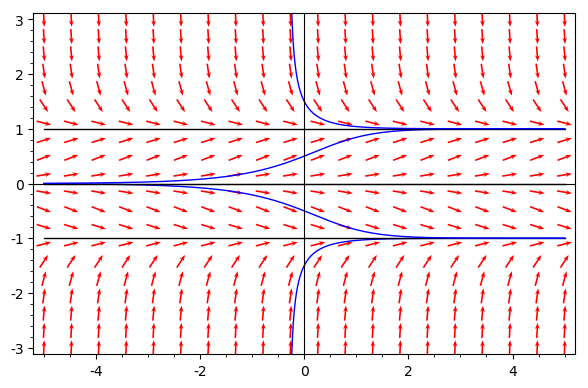

In [19]:
sf=plot_slope_field(f(s),(t,-5,5),(s,-3,3),headaxislength=3, headlength=4,color='red')
g1=desolve_rk4(deq, x, [0,-1.5], step=0.01, end_points= [-5,5], output='plot',color='blue')
g2=desolve_rk4(deq, x, [0,-1], step=0.01, end_points= [-5,5], output='plot',color='black')
g3=desolve_rk4(deq, x, [0,-0.5], step=0.01, end_points= [-5,5], output='plot',color='blue')
g4=desolve_rk4(deq, x, [0,0], step=0.01, end_points= [-5,5], output='plot',color='black')
g5=desolve_rk4(deq, x, [0,0.5], step=0.01, end_points= [-5,5], output='plot',color='blue')
g6=desolve_rk4(deq, x, [0,1], step=0.01, end_points= [-5,5], output='plot',color='black')
g7=desolve_rk4(deq, x, [0,1.5], step=0.01, end_points= [-5,5], output='plot',color='blue')
g=sf+g1+g2+g3+g4+g5+g6+g7
g.show(ymin=-3,ymax=3)

## Sisteme planare. Puncte de echilibru. Stabilitate

Printr-un sistem planar de ecuatii diferentiale autonome intelegem un sistem de forma:

\begin{equation*}
\left \{ 
\begin{array}{cl}
x^{\prime }= & f_{1}\left( x,y\right)  \\ 
y^{\prime }= & f_{2}\left( x,y\right) 
\end{array}%
\right. 
\end{equation*}

Solutiile constante ale sistemului planar

\begin{equation*}
\left \{ 
\begin{array}{cl}
x\left( t\right) \equiv  & x^{\ast } \\ 
y\left( t\right) \equiv & y^{\ast }%
\end{array}%
\right. 
\end{equation*}

se numesc **solutii de echilibru**, punctul $X^*(x^*,y^*)$ se numeste **punct de echilibru**. 


Punctele de echilibru $X^*(x^*,y^*)$ sunt solutiile reale ale sistemului algebric:

\begin{equation*}
\left \{ 
\begin{array}{cl}
f_{1}\left( x,y\right)= &0  \\ 
f_{2}\left( x,y\right)= &0 
\end{array}%
\right. 
\end{equation*}

### Cazul sistemelor liniare

In cazul sistemelor liniare:

\begin{equation*}
\left \{ 
\begin{array}{cl}
x^{\prime }= & a_{11}x+a_{12}y \\ 
y^{\prime }= & a_{21}x+a_{22}y%
\end{array}%
\right. 
\end{equation*}

sau in forma vectoriala

\begin{equation*}
\left( 
\begin{array}{c}
x^{\prime } \\ 
y^{\prime }%
\end{array}%
\right) =A\cdot \left( 
\begin{array}{c}
x \\ 
y%
\end{array}%
\right) 
\end{equation*}
unde
\begin{equation*}
A=\left( 
\begin{array}{cc}
a_{11} & a_{12} \\ 
a_{21} & a_{22}%
\end{array}%
\right) 
\end{equation*}

originea $(0,0)$ este un punct de echilibru.

<b>Criteriul de stabilitate in cazul sistemelor liniare</b>

Punctul de echilibru $(0,0)$ este:
1. local stabil $\Longleftrightarrow$ $\operatorname{Re}\lambda\leq 0$, $\forall \lambda$ valoare proprie a matricii $A$, egalitatea cu 0 avand loc pentru valori proprii simple;
+ asimptotic stabil $\Longleftrightarrow$ $\operatorname{Re}\lambda < 0$, $\forall \lambda$ valoare proprie a matricii $A$;
+ instabil $\Longleftrightarrow$ nu are loc 1.

<b>Clasificarea punctului de echilibru (0,0):</b>

Spunem ca punctul de echilibru (0,0) este:
* de tip **nod** daca $\lambda _{1},\lambda _{2}\in \mathbb{R}$ si $\lambda_{1}\cdot \lambda _{2}>0$;
* de tip **sa** daca $\lambda _{1},\lambda _{2}\in \mathbb{R}$ si $\lambda_{1}\cdot \lambda _{2}<0$;
* de tip **focus** daca $\lambda _{1,2}=\alpha \pm i\beta \in \mathbb{C}$, $\alpha \neq 0$;
* de tip **centru** daca $\lambda _{1,2}= \pm i\beta \in \mathbb{C}$.


Fie sistemul liniar:

\begin{equation*}
\left \{ 
\begin{array}{cl}
x^{\prime }= & x+y \\ 
y^{\prime }= & x-y%
\end{array}%
\right. 
\end{equation*}

In acest caz avem:

\begin{equation*}
A=\left( 
\begin{array}{cc}
1 & 1 \\ 
1 & -1%
\end{array}%
\right) 
\end{equation*}

Valorile proprii ale matricii $A$ pot fi determinate utilizand comanda *eigenvalues*

In [20]:
reset()
A=matrix([[1,1],[1,-1]])
A

[ 1  1]
[ 1 -1]

In [21]:
A.eigenvalues()

[-1.414213562373095?, 1.414213562373095?]

Sagemath avertizeaza faptul ca valorile proprii nu au fost determinate exact prin semnul ?, comanda returneaza o valoare aproximativa a acestora, dar pentru analiza stabilitatii acest lucru este suficient.

Astfel, pentru acest exemplu, punctul de echilibru $(0,0)$ este instabil deoarece una dintre valorile proprii este pozitiva, $1.414...>0$, fiind de tip sa. 

Daca dorim detereminarea exacta a valorilor proprii acest lucru se poate face prin determinarea radacinilor polinomului caracteristic al matricii $A$:


In [22]:
cp(x)=A.charpoly()
cp

x |--> x^2 - 2

In [23]:
solve(cp==0,x)

[x == -sqrt(2), x == sqrt(2)]

Pentru reprezentarea portretului fazic trebuie sa folosim comanda de rezolvare numerica *desolve_system_rk4* deoarece in general sistemele planare nu sunt rezolvabile.

Structura comenzii *desolve_system_rk4* este:

*desolve_system_rk4(des, vars, ics=None, ivar=None, end_points=None, step=0.1)*

INPUT:

* *des* - lista mebrilor drepti al ecuatiilor sistemului


+ *vars* - lista variabilelor dependende (functiile necunoscute)


+ *ivar* - (optional) trebuie specificat daca sistemul este autonom sau contine mai multi parametrii


+ *ics* - lista conditiilor initiale de forma [x0,y01,y02,y03,....]


+ *end_points* - capetele intervalului

    + daca *end_points* este a sau [a], integrarea se face pe intervalul min(ics[0],a) si max(ics[0],a)

    + daca *end_points* este None, este utilizat implicit end_points=ics[0]+10

    + daca *end_points* este [a,b] integrarea se face pe intervalul min(ics[0], a) and max(ics[0], b)


+ *step* – (optional, default: 0.1) marimea pasului metodei (numar pozitiv)


OUTPUT:

Se returneaza o lista de forma $[t_i,x(t_i),y(t_i)]$ .

**Observatie**. Comanda *desolve_system_rk4* nu are ca si output reprezentarea grafica. Pentru reprezentare grafica trebuie utilizata in plus comanda *list_plot*.

In [24]:
x,y,t=var('x,y,t')
f1(x,y)=x+y
f2(x,y)=x-y

In [25]:
desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,1,-1], ivar = t, end_points = [-1,1], step = 0.1)

[[-1.0, 2.178175582521938, -4.914760225614616],
 [-0.9, 1.925422767612532, -4.252331374129021],
 [-0.8, 1.711242398200907, -3.675090485140899],
 [-0.7000000000000001, 1.531343747591895, -3.17147355560485],
 [-0.6000000000000001, 1.382122862773177, -2.73139150871942],
 [-0.5, 1.260590365556255, -2.346028077070541],
 [-0.4, 1.164311565637939, -2.007663184267604],
 [-0.3, 1.091357685852782, -1.709518286834819],
 [-0.2, 1.0402672225, -1.445620578055556],
 [-0.1, 1.010016666666667, -1.210683333333333],
 [0, 1, -1],
 [0.1, 1.010016666666667, -0.80935],
 [0.2, 1.0402672225, -0.6349138669444444],
 [0.3, 1.091357685852782, -0.4731970848707454],
 [0.4, 1.164311565637939, -0.3209599470082735],
 [0.5, 1.260590365556255, -0.1751526540419697],
 [0.6000000000000001, 1.382122862773177, -0.0328542168269349],
 [0.7000000000000001, 1.531343747591894, 0.1087860604210598],
 [0.8, 1.711242398200906, 0.2526056887390845],
 [0.9, 1.925422767612531, 0.4014858389039571],
 [1.0, 2.178175582521938, 0.5584090605707

Se observa ca *desolve_system_rk4* returneaza o lista de forma $[t,x(t),y(t)]$ pentru $t\in [a,b]$, unde $[a,b]$ este intervalul pe care se face integrarea, specificat prin optiunea *end_points*.

Pentru a reprezenta orbita corespunzatoare solutiei ce satisface conditia initiala $x(0)=x0, y(0)=y0$ data prin optiunea $[0,x0,y0]$ vom reprezenta punctele $[x(t),y(t)]$ utilizand *list_plot* cu optiunea *plotjoined=True*.

Mai intai generam aceasta lista de valori extragand-o din lista returnata de *desolve_system_rk4*, apoi aplicam *list_plot*.


In [26]:
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,1,-1], ivar = t, end_points = [-1,1], step = 0.1)
XY=[ [j, k] for i,j,k in P]
XY

[[2.178175582521938, -4.914760225614616],
 [1.925422767612532, -4.252331374129021],
 [1.711242398200907, -3.675090485140899],
 [1.531343747591895, -3.17147355560485],
 [1.382122862773177, -2.73139150871942],
 [1.260590365556255, -2.346028077070541],
 [1.164311565637939, -2.007663184267604],
 [1.091357685852782, -1.709518286834819],
 [1.0402672225, -1.445620578055556],
 [1.010016666666667, -1.210683333333333],
 [1, -1],
 [1.010016666666667, -0.80935],
 [1.0402672225, -0.6349138669444444],
 [1.091357685852782, -0.4731970848707454],
 [1.164311565637939, -0.3209599470082735],
 [1.260590365556255, -0.1751526540419697],
 [1.382122862773177, -0.0328542168269349],
 [1.531343747591894, 0.1087860604210598],
 [1.711242398200906, 0.2526056887390845],
 [1.925422767612531, 0.4014858389039571],
 [2.178175582521938, 0.5584090605707386]]

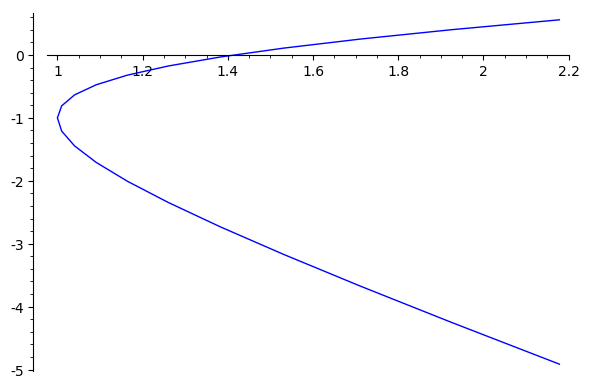

In [27]:
list_plot(XY,plotjoined=True, color='blue')

Daca dorim reprezentarea mai multor orbite trebuie generat graficul pentru fiecare orbita corespunzatoare setului de conditii initiale ales, adica trebuiesc executati pasii anteriori pentru fiecare orbita. In plus, pentru a vizualiza sensul de parcurgere al acestora trebuie generat si campul de directii prin utilizarea comenzii *plot_vector_field*.

Pentru sistemul considerat sa reprezentam campul de directii si orbitele corespunzatoare punctelor $(1,0)$, $(2,0)$, $(-1,0)$, $(-2,0)$, $(0,1)$, $(0,2)$, $(0,-1)$, $(0,-2)$:

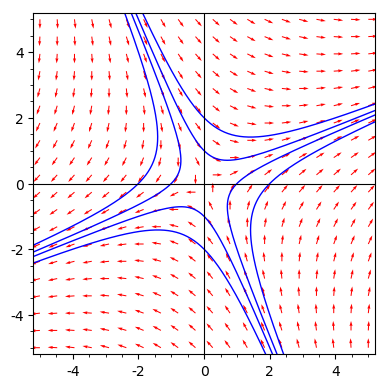

In [28]:
n=sqrt(f1(x,y)^2+f2(x,y)^2)
g=plot_vector_field( [f1(x,y)/n,f2(x,y)/n], [x,-5,5], [y,-5,5],color='red' ,aspect_ratio = 1)
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,1,0], ivar = t, end_points = [-5,5], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,2,0], ivar = t, end_points = [-5,5], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,-1,0], ivar = t, end_points = [-5,5], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,-2,0], ivar = t, end_points = [-5,5], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,0,1], ivar = t, end_points = [-5,5], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,0,2], ivar = t, end_points = [-5,5], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,0,-1], ivar = t, end_points = [-5,5], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,0,-2], ivar = t, end_points = [-5,5], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
g.show(xmin=-5,xmax=5,ymin=-5,ymax=5)

### Cazul sistemelor neliniare

In cazul sistemelor neliniare de forma:

\begin{equation*}
\left \{ 
\begin{array}{cl}
x^{\prime }= & f_{1}\left( x,y\right)  \\ 
y^{\prime }= & f_{2}\left( x,y\right) 
\end{array}%
\right. 
\end{equation*}

mai intai determinam punctele de echilibru  $X^*(x^*,y^*)$ prin determinarea solutiilor reale ale sistemul algebric:

\begin{equation*}
\left \{ 
\begin{array}{cl}
f_{1}\left( x,y\right)= &0  \\ 
f_{2}\left( x,y\right)= &0 
\end{array}%
\right. 
\end{equation*}

Stabilitatea punctului de echilibru se obtine prin aplicarea *Teoremei stabilitatii in prima aproximatie*. 

**Teorema stabilitatii in prima aproximatie**

Fie $X^*(x^*,y^*)$ un punct de echilibru al sistemului neliniar.

* Daca $\operatorname{Re}(\lambda)<0$ pentru orice valoare proprie $\lambda$ a matricii $J_f(X^*)=J_f(x^*,y^*)$ atunci $X^*$ este local asimptotic stabil.


* Daca exista o valoare proprie $\lambda$ a matricii $J_f(X^*)=J_f(x^*,y^*)$ cu $\operatorname{Re}(\lambda)>0$ atunci $X^*$ este instabil, unde $J_f(X)$ este matricea jacobiana a functiei vectoriale $f = (f_1, f_2)$


Fie sistemul neliniar:

\begin{equation*}
\left \{ 
\begin{array}{cl}
x^{\prime }= & x\cdot (1-\frac{1}{2}x-y) \\ 
y^{\prime }= & y\cdot (x-1-\frac{1}{2}y)%
\end{array}%
\right. 
\end{equation*}


In [29]:
reset()
x,y,t=var('x,y,t')
f1(x,y)=x*(1-1/2*x-y)
f2(x,y)=y*(x-1-1/2*y)

In [30]:
EquilP=solve([f1(x,y)==0,f2(x,y)==0],x,y)
EquilP

[[x == 0, y == 0], [x == 2, y == 0], [x == 0, y == -2], [x == (6/5), y == (2/5)]]

Generam matricea jacobiana a functiei vectoriale  $f = (f_1, f_2)$ utilizand comanda *jacobian*:

In [31]:
jacobian((f1(x,y),f2(x,y)), (x,y))

[-x - y + 1         -x]
[         y  x - y - 1]

In [32]:
J=jacobian((f1(x,y),f2(x,y)), (x,y))
J

[-x - y + 1         -x]
[         y  x - y - 1]

Pentru fiecare punct de echilibru $X^*(x^*,y^*)$ evaluam $J_f(x^*,y^*)$, calculam valorile proprii corespunzatoare si aplicam Teorema stabilitatii in prima aproximatie.

Pentru punctul de echilibru $(0,0)$ obtinem:


In [33]:
J(x=0,y=0)

[ 1  0]
[ 0 -1]

In [34]:
J(x=0,y=0).eigenvalues()

[-1, 1]

In cazul punctului de echilibru $(0,0)$ avem  $\lambda_1=-1$ si $\lambda_2=1$, cum $\lambda_2>0$ atunci $(0,0)$ este *instabil*, el fiind de tip *sa* (si in cazul sistemelor neliniare se pastreaza clasificarea lui (0,0) din cazul sistemelor liniare).

Pentru al doilea punct de echilibru obtinem:


In [35]:
J(x=2,y=0)

[-1 -2]
[ 0  1]

In [36]:
J(x=2,y=0).eigenvalues()

[-1, 1]

Observam ca avem aceleasi valori proprii ca in cazul punctului $(0,0)$, deci si punctul de echilibru $(2,0)$ este *instabil* de tip *sa*.

Pentru cel de al treilea punct de echilibru obtinem: 


In [37]:
J(x=0,y=-2)

[ 3  0]
[-2  1]

In [38]:
J(x=0,y=-2).eigenvalues()

[1, 3]

Pentru $(0,-2)$ avem $\lambda_1=1$ si $\lambda_2=3$, ambele valori proprii  $\lambda_{1,2}>0$ deci $(0,-2)$ este *instabil* de tip *nod*.

Pentru ultimul punct de echilibru obtinem:

In [39]:
J(x=6/5,y=2/5)

[-3/5 -6/5]
[ 2/5 -1/5]

In [40]:
J(x=6/5,y=2/5).eigenvalues()

[-1/5*I*sqrt(11) - 2/5, 1/5*I*sqrt(11) - 2/5]

Pentru punctul de echilibru $(6/5,2/5)$ avem $\lambda _{1,2}=-\frac{2}{5}\mp i\frac{\sqrt{11}}{5}$ cu $\operatorname{Re}(\lambda_{1,2})=-\frac{2}{5}<0$, deci punctul de echilibru $(6/5,2/5)$ este *local asimptotic stabil* de tip *focus*.

Pentru reprezentarea portretului fazic trebuie aleasa o fereastra de reprezentare $\left[ a,b\right] \times \left[ c,d\right] $ care sa contina toate punctele de echilibru si trebuiesc alese cateva orbite aflate in vecinatatea acestor puncte de echilibru.

In cazul sistemului considerat putem considera fereastra de reprezentare $\left[ -3,3\right] \times \left[ -3,3\right] $


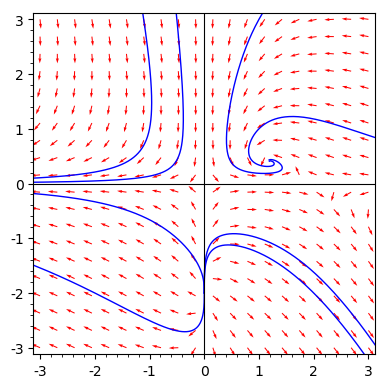

In [41]:
n=sqrt(f1(x,y)^2+f2(x,y)^2)
g=plot_vector_field( [f1(x,y)/n,f2(x,y)/n], [x,-3,3], [y,-3,3],color='red' ,aspect_ratio = 1)
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,1,1], ivar = t, end_points = [-10,10], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,1,3], ivar = t, end_points = [-10,10], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,-1,1], ivar = t, end_points = [-10,10], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,-0.5,3], ivar = t, end_points = [-10,10], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,-0.5,-1], ivar = t, end_points = [-10,10], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,-2,-2], ivar = t, end_points = [-10,10], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,1,-1], ivar = t, end_points = [-10,10], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics = [0,2,-2], ivar = t, end_points = [-10,10], step = 0.01)
XY=[ [j, k] for i,j,k in P]
g=g+list_plot(XY,plotjoined=True, color='blue')
g.show(xmin=-3,xmax=3,ymin=-3,ymax=3)